In [1]:
import pandas as pd
import seaborn as sns

from plot_utils import set_spanish_locale, matplot_formatter_mil_spanish

set_spanish_locale()

In [2]:
sns.set_style("whitegrid")
sns.set_context("notebook")

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]= (8, 6)

In [3]:
import analysis_utils as autils
import info_rules as ir

In [4]:
def build_transactions_filename(family_name, min_len, mr_type, clean_mode):
    assert mr_type in ["ALL", "NE", "NN", "SMR"]
    assert clean_mode in ["sub", "sup", "min"]

    min_len = str(min_len)
    family_filename = f"{family_name}_len{min_len}_{mr_type}_{clean_mode}"
    return family_filename

In [5]:
def mrs_and_uniques_in_clean_transaction(family_name, min_len, mr_type, clean_mode):
    family_filename = build_transactions_filename(family_name, min_len, mr_type, clean_mode)
    
    transactions = autils.read_clean_transactions(family_filename, "output/clean_transactions")
    mrs = ir.all_mrs_from_transactions(transactions)
    mrs_unique = set(mrs)
    return len(mrs), len(mrs_unique)


In [6]:
# ./generate_rules.r --transactions_name=NEWAnk_len4_NE_sub
#rules: 4887

# ./generate_rules.r --transactions_name=NEWAnk_len4_NE_min
#rules: 4887


In [7]:
# ./generate_rules.r --transactions_name=NEWAnk_len5_NE_sub
#rules: 172

# ./generate_rules.r --transactions_name=NEWAnk_len5_NE_min
#rules: 172

In [8]:
# ./generate_rules.r --transactions_name=NEWAnk_len6_NE_sub
#rules: 11

# ./generate_rules.r --transactions_name=NEWAnk_len6_NE_min
#rules: 11

In [9]:
# ./generate_rules.r --transactions_name=NEWAnk_len7_NE_sub
#rules: 2

# ./generate_rules.r --transactions_name=NEWAnk_len7_NE_min
#rules: 2

In [10]:
def fill_unique_mrs_info(family_name, min_len, max_len):
    unique_mrs_info = {
        "len": [],
        "MR_type": [],
        "unique_mrs": [],
        "total_mrs": [],
    }

    for min_len in range(min_len, max_len + 1):
        for mr_type in ["ALL", "NE", "NN", "SMR"]:
            print(f"Running len: {min_len}, MR_type: {mr_type}")
            total_mrs, unique_mrs = mrs_and_uniques_in_clean_transaction("NEWAnk", min_len, mr_type, "min")

            unique_mrs_info["len"].append(min_len)
            unique_mrs_info["MR_type"].append(mr_type)
            unique_mrs_info["total_mrs"].append(total_mrs)
            unique_mrs_info["unique_mrs"].append(unique_mrs)
            
    return unique_mrs_info

In [11]:
unique_mrs_info = fill_unique_mrs_info("NEWAnk", 4, 8)

Running len: 4, MR_type: ALL
Running len: 4, MR_type: NE
Running len: 4, MR_type: NN
Running len: 4, MR_type: SMR
Running len: 5, MR_type: ALL
Running len: 5, MR_type: NE
Running len: 5, MR_type: NN
Running len: 5, MR_type: SMR
Running len: 6, MR_type: ALL
Running len: 6, MR_type: NE
Running len: 6, MR_type: NN
Running len: 6, MR_type: SMR
Running len: 7, MR_type: ALL
Running len: 7, MR_type: NE
Running len: 7, MR_type: NN
Running len: 7, MR_type: SMR
Running len: 8, MR_type: ALL
Running len: 8, MR_type: NE
Running len: 8, MR_type: NN
Running len: 8, MR_type: SMR


In [12]:
df_unique_mrs_info_records = pd.DataFrame(unique_mrs_info)

In [13]:
df_unique_mrs_info_records.head()

,len,MR_type,unique_mrs,total_mrs
0,4,ALL,158105,22127342
1,4,NE,91588,19448940
2,4,NN,64383,2671420
3,4,SMR,352103,647367
4,5,ALL,1666141,21346095


In [14]:
df_unique_mrs_info_records[df_unique_mrs_info_records.MR_type == "NE"]

,len,MR_type,unique_mrs,total_mrs
1,4,NE,91588,19448940
5,5,NE,188657,6295440
9,6,NE,222947,3869206
13,7,NE,131594,2282739
17,8,NE,89344,1418246


In [15]:
def get_unique_and_total_info_dfs(df_mrs_info_records):
    # https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping
    df_unique_mrs_info = df_mrs_info_records.pivot(
        index='len', columns='MR_type', values='unique_mrs')
    df_total_mrs_info = df_mrs_info_records.pivot(
        index='len', columns='MR_type', values='total_mrs')
    
    return df_unique_mrs_info, df_total_mrs_info
    

In [16]:
def plot_mrs_categories_by_minlen(df_mrs_info, ylabel):
    ax = df_mrs_info.plot()
    
    plt.xticks(df_mrs_info.index)
    plt.legend(title="Categoría de MR")
    
    ax.set_ylabel(ylabel)
    ax.set_xlabel('min_len')
    ax.get_yaxis().set_major_formatter(matplot_formatter_mil_spanish())

    fig = ax.get_figure()
    return fig

In [17]:
df_unique_mrs_info, df_total_mrs_info = get_unique_and_total_info_dfs(df_unique_mrs_info_records)

df_unique_mrs_info

MR_type,ALL,NE,NN,SMR
len,,,,
4,158105,91588,64383,352103
5,1666141,188657,1098712,384530
6,1855589,222947,785439,848748
7,603460,131594,223944,251206
8,298552,89344,107743,107521


In [18]:
unique_mrs_info_lrr = fill_unique_mrs_info("LRR1", 4, 7)

Running len: 4, MR_type: ALL
Running len: 4, MR_type: NE
Running len: 4, MR_type: NN
Running len: 4, MR_type: SMR
Running len: 5, MR_type: ALL
Running len: 5, MR_type: NE
Running len: 5, MR_type: NN
Running len: 5, MR_type: SMR
Running len: 6, MR_type: ALL
Running len: 6, MR_type: NE
Running len: 6, MR_type: NN
Running len: 6, MR_type: SMR
Running len: 7, MR_type: ALL
Running len: 7, MR_type: NE
Running len: 7, MR_type: NN
Running len: 7, MR_type: SMR


In [19]:
df_unique_mrs_info_lrr_records = pd.DataFrame(unique_mrs_info_lrr)

In [20]:
df_unique_mrs_info_lrr, df_total_mrs_info_lrr = get_unique_and_total_info_dfs(df_unique_mrs_info_lrr_records)

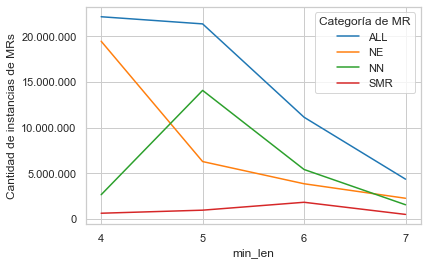

In [21]:
fig = plot_mrs_categories_by_minlen(df_total_mrs_info_lrr, "Cantidad de instancias de MRs")


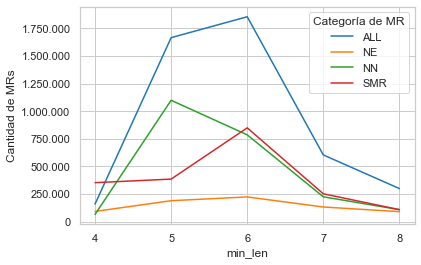

In [22]:
fig = plot_mrs_categories_by_minlen(df_unique_mrs_info, "Cantidad de MRs")
# fig.savefig('imagenes/mr_categorias/mrs_distintos_por_categoria_minlen.pdf', bbox_inches = "tight")


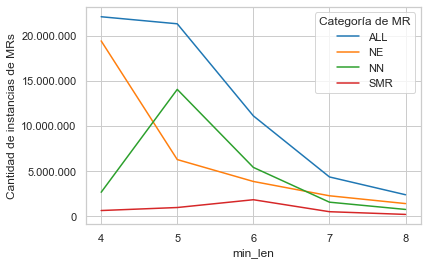

In [23]:
fig = plot_mrs_categories_by_minlen(df_total_mrs_info, "Cantidad de instancias de MRs")
# fig.savefig('imagenes/mr_categorias/mrs_totales_por_categoria_minlen.pdf', bbox_inches = "tight")


In [24]:
df_total_mrs_info

MR_type,ALL,NE,NN,SMR
len,,,,
4,22127342,19448940,2671420,647367
5,21346095,6295440,14075055,981457
6,11141086,3869206,5428321,1845203
7,4370848,2282739,1573971,517656
8,2396571,1418246,768192,216804


In [25]:
df_unique_mrs_info

MR_type,ALL,NE,NN,SMR
len,,,,
4,158105,91588,64383,352103
5,1666141,188657,1098712,384530
6,1855589,222947,785439,848748
7,603460,131594,223944,251206
8,298552,89344,107743,107521


In [26]:
df_unique_mrs_info.index

Int64Index([4, 5, 6, 7, 8], dtype='int64', name='len')

In [27]:
def df_with_types_ratios(df_mrs):
    df = df_mrs.reset_index()#.set_index('len')
    df['NE/ALL'] = df['NE'] / df['ALL']
    df['NN/ALL'] = df['NN'] / df['ALL']
    df['SMR/ALL'] = df['SMR'] / df['ALL']
    return df

In [28]:
df_with_types_ratios(df_unique_mrs_info)

MR_type,len,ALL,NE,NN,SMR,NE/ALL,NN/ALL,SMR/ALL
0,4,158105,91588,64383,352103,0.579286,0.407217,2.227020
1,5,1666141,188657,1098712,384530,0.113230,0.659435,0.230791
2,6,1855589,222947,785439,848748,0.120149,0.423283,0.457401
3,7,603460,131594,223944,251206,0.218066,0.371100,0.416276
4,8,298552,89344,107743,107521,0.299258,0.360885,0.360142


In [29]:
df_mrs_total_ratios_newank = df_with_types_ratios(df_total_mrs_info)
df_mrs_total_ratios_newank

MR_type,len,ALL,NE,NN,SMR,NE/ALL,NN/ALL,SMR/ALL
0,4,22127342,19448940,2671420,647367,0.878955,0.120729,0.029256
1,5,21346095,6295440,14075055,981457,0.294922,0.659374,0.045978
2,6,11141086,3869206,5428321,1845203,0.347292,0.487234,0.165621
3,7,4370848,2282739,1573971,517656,0.522265,0.360107,0.118434
4,8,2396571,1418246,768192,216804,0.591781,0.320538,0.090464


In [30]:
def plot_mrs_proportions_by_minlen(df_mrs_ratios):
    df_mrs_ratios_to_plot = df_mrs_total_ratios_newank[["len", "NE/ALL", "NN/ALL", "SMR/ALL"]]
    df_mrs_ratios_to_plot = df_mrs_ratios_to_plot.set_index("len")
    
    # Default color cycle
    # https://stackoverflow.com/questions/42086276/get-default-line-colour-cycle
    # u'#1f77b4', u'#ff7f0e', u'#2ca02c', u'#d62728'
    
    # Los styles de colores son para ser consistentes con los otros graficos
    # (osea, que NE sea el amarillo por ej)
    ax = df_mrs_ratios_to_plot.plot(style={
        "NE/ALL": u'#ff7f0e',
        "NN/ALL": u'#2ca02c',
        "SMR/ALL": u'#d62728'
        })
    
    plt.xticks(df_mrs_ratios_to_plot.index)
    plt.legend(title="Proporción")
    
    ax.set_ylabel("Proporcion de instancias por categoría")
    ax.set_xlabel('min_len')
    plt.ylim(0, 1)
    # ax.get_yaxis().set_major_formatter(matplot_formatter_mil_spanish())

    fig = ax.get_figure()
    return fig

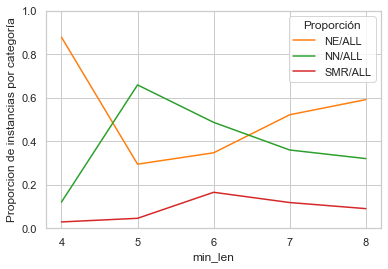

In [31]:
fig = plot_mrs_proportions_by_minlen(df_mrs_total_ratios_newank)
# fig.savefig('imagenes/mr_categorias/mrs_totales_proporciones_por_categoria_minlen_newank.pdf', bbox_inches = "tight")

In [32]:
def build_filename_rules(family_name, min_len, mr_type, clean_mode, min_support):
    assert mr_type in ["ALL", "NE", "NN", "SMR"]
    assert clean_mode in ["sub", "sup", "min"]
    min_len = str(min_len)
    min_support = ('%f' % float(min_support)).rstrip('0').rstrip('.')
    confidence = "0.9"
    family_a = f"{family_name}_len{min_len}_{mr_type}_{clean_mode}"
    path_rules_a = f"output/rules/{family_a}_s{min_support}_c{confidence}.csv"
    return path_rules_a

In [33]:
def build_df_rules(family_name, min_len, mr_type, clean_mode, min_support):
    path_rules = build_filename_rules(family_name, min_len, mr_type, clean_mode, min_support)
    df_rules = pd.read_csv(path_rules)
    return df_rules

In [34]:
# min_lens = ["4", "5", "6", "7", "8"]
# min_sups = ["0.015", "0.020", "0.025", "0.030"]

def build_df_rules_info_records(family_name, min_lens, min_sups):
    rules_tmp_info = {
        "len": [],
        "MR_type": [],
        "min_sup": [],
        "rules": [],
    }

    for min_len in min_lens:
        for mr_type in ["ALL", "NE", "NN", "SMR"]:
            for min_sup in min_sups:
                print(f"Running len: {min_len}, MR_type: {mr_type}, min_sup: {min_sup}")
                df_rules_tmp = build_df_rules(family_name, min_len, mr_type, "min", min_sup)

                rules_tmp_info["len"].append(min_len)
                rules_tmp_info["MR_type"].append(mr_type)
                rules_tmp_info["min_sup"].append(min_sup)
                rules_tmp_info["rules"].append(len(df_rules_tmp))
                
    return pd.DataFrame(rules_tmp_info)


In [35]:
df_rules_newank_info_records = build_df_rules_info_records("NEWAnk", ["4", "5", "6", "7", "8"], ["0.015", "0.020", "0.025", "0.030"])

Running len: 4, MR_type: ALL, min_sup: 0.015
Running len: 4, MR_type: ALL, min_sup: 0.020
Running len: 4, MR_type: ALL, min_sup: 0.025
Running len: 4, MR_type: ALL, min_sup: 0.030
Running len: 4, MR_type: NE, min_sup: 0.015
Running len: 4, MR_type: NE, min_sup: 0.020
Running len: 4, MR_type: NE, min_sup: 0.025
Running len: 4, MR_type: NE, min_sup: 0.030
Running len: 4, MR_type: NN, min_sup: 0.015
Running len: 4, MR_type: NN, min_sup: 0.020
Running len: 4, MR_type: NN, min_sup: 0.025
Running len: 4, MR_type: NN, min_sup: 0.030
Running len: 4, MR_type: SMR, min_sup: 0.015
Running len: 4, MR_type: SMR, min_sup: 0.020
Running len: 4, MR_type: SMR, min_sup: 0.025
Running len: 4, MR_type: SMR, min_sup: 0.030
Running len: 5, MR_type: ALL, min_sup: 0.015
Running len: 5, MR_type: ALL, min_sup: 0.020
Running len: 5, MR_type: ALL, min_sup: 0.025
Running len: 5, MR_type: ALL, min_sup: 0.030
Running len: 5, MR_type: NE, min_sup: 0.015
Running len: 5, MR_type: NE, min_sup: 0.020
Running len: 5, MR_t

In [36]:
df_rules_newank_info_records

,len,MR_type,min_sup,rules
0,4,ALL,0.015,29513
1,4,ALL,0.020,10111
2,4,ALL,0.025,4888
3,4,ALL,0.030,2718
4,4,NE,0.015,29498
...,...,...,...,...
75,8,NN,0.030,0
76,8,SMR,0.015,0
77,8,SMR,0.020,0
78,8,SMR,0.025,0


In [37]:
def build_df_rules_table_with_support(min_sup, df_info_records):
    assert type(min_sup) == str
    
    df_rules_info_records_tmp = df_info_records[
        df_info_records["min_sup"] == min_sup]

    df_rules_tmp_info = df_rules_info_records_tmp.pivot(
        index='len', columns='MR_type', values='rules')
    
    return df_rules_tmp_info

In [38]:
df_rules_newank_info_records_tmp = df_rules_newank_info_records[
    df_rules_newank_info_records["min_sup"] == "0.025"]

df_rules_newank_tmp_info = df_rules_newank_info_records_tmp.pivot(
    index='len', columns='MR_type', values='rules')

df_rules_newank_tmp_info

MR_type,ALL,NE,NN,SMR
len,,,,
4,4888,4887,0,0
5,174,172,0,0
6,13,11,0,0
7,2,2,0,0
8,0,0,0,0


In [71]:
# rows = ["4", "5", "6", "7", "8"] (eg =min_lens)
def latex_content_for_rules_by_category(row_labels, df_rules_tmp_info):
    content = ""
    for row_label in row_labels:
        line = [row_label]
        for mr_type in ["ALL", "NE", "NN", "SMR"]:  # OJO orden! Que coincida con Latex
            rules = df_rules_tmp_info[mr_type][row_label]
            line.append(str(rules))

        content += "  " + " & ".join(line)
        content += "\\\\ \n \\hline \n"
    return content


def print_rules_table_with_support_latex(family_name, min_sup, df_info_records):
    df_rules_tmp_info = build_df_rules_table_with_support(min_sup, df_info_records)

    header = """
\\begin{table}[H]
\\begin{center}
\\begin{tabular}{|c||c|c|c|c|} 
 \\hline
\\diagbox{\\textbf{{\\minlen}}}{\\textbf{Categoría}} & \\textbf{ALL} & \\textbf{NE} & \\textbf{NN} & \\textbf{SMR} \\\\ 
 \\hline\\hline
     """
# \\caption{""" + f"{family_name}" + """. Cantidad de reglas por categoría. """ + f"min\\_sup={min_sup}" + """}
    footer = """
\\end{tabular}
\\caption{Cantidad de reglas generadas para transacciones refinadas en modo \\emph{minimum}, formadas por MRs de cada categoría (ALL, NE, NN, SMR). Variamos {\minlen} entre 4 y 8. Familia """ + "\\texttt{" + family_name + "}. {\\minsup} " + min_sup + ". {\\minconf} 0.90}" + """\\end{center}
\\end{table} 
    """
    content = latex_content_for_rules_by_category(["4", "5", "6", "7", "8"], df_rules_tmp_info)
    print(header + content + footer)
    
    
def print_rules_table_with_min_len_latex(family_name, min_len, df_info_records):
    df_rules_tmp_info = build_df_rules_table_with_min_len(min_len, df_info_records)

    header = """
\\begin{table}[H]
\\begin{center}
\\begin{tabular}{|c||c|c|c|c|} 
 \\hline
 \\diagbox{\\textbf{{\\minsup}}}{\\textbf{Categoría}} & \\textbf{ALL} & \\textbf{NE} & \\textbf{NN} & \\textbf{SMR} \\\\ 
 \\hline\\hline
     """

    # \\caption{""" + f"{family_name}" + """. Cantidad de reglas por categoría. """ + f"min\\_len={min_len}" + """}
    footer = """
\\end{tabular}
\\caption{Cantidad de reglas generadas para transacciones refinadas en modo \\emph{minimum}, formadas por MRs de cada categoría (ALL, NE, NN, SMR). Variamos {\minsup} entre 0.015 y 0.030, con incrementos de 0.005. Familia """ + "\\texttt{" + family_name + "}. {\\minlen} " + min_len + ". {\\minconf} 0.90}" + """\\end{center}
\\end{table} 
    """
    content = latex_content_for_rules_by_category(["0.015", "0.020", "0.025", "0.030"], df_rules_tmp_info)
    print(header + content + footer)

In [40]:
build_df_rules_table_with_support("0.025", df_rules_newank_info_records)

MR_type,ALL,NE,NN,SMR
len,,,,
4,4888,4887,0,0
5,174,172,0,0
6,13,11,0,0
7,2,2,0,0
8,0,0,0,0


In [41]:
# print_rules_table_with_support_latex("NEWAnk", "0.025", df_rules_newank_info_records)

In [42]:
build_df_rules_table_with_support("0.020", df_rules_newank_info_records)

MR_type,ALL,NE,NN,SMR
len,,,,
4,10111,10107,0,0
5,311,308,0,0
6,23,21,0,0
7,3,3,0,0
8,0,0,0,0


In [43]:
# print_rules_table_with_support_latex("0.020", df_rules_newank_info_records)

In [44]:
build_df_rules_table_with_support("0.015", df_rules_newank_info_records)

MR_type,ALL,NE,NN,SMR
len,,,,
4,29513,29498,0,0
5,1192,1186,0,0
6,100,46,2,0
7,10,10,0,0
8,0,0,0,0


In [45]:
build_df_rules_table_with_support("0.030", df_rules_newank_info_records)

MR_type,ALL,NE,NN,SMR
len,,,,
4,2718,2718,0,0
5,112,112,0,0
6,8,8,0,0
7,1,1,0,0
8,0,0,0,0


In [46]:
# print_rules_table_with_support_latex("0.030", df_rules_newank_info_records)

In [47]:
build_df_rules("NEWAnk", "4", "ALL", "min", "0.025")

,rules,support,confidence,coverage,lift,count
0,{HYAC} => {LHYA},0.026485,0.932166,0.028412,3.953442,852
1,{PLHD} => {TPLH},0.030557,0.905991,0.033728,1.522956,983
2,{ALHM} => {TALH},0.034225,0.913693,0.037458,1.706688,1101
3,{PLHM} => {TPLH},0.033728,0.915612,0.036837,1.539129,1085
4,{PLHT} => {TPLH},0.035997,0.930868,0.038671,1.564775,1158
...,...,...,...,...,...,...
4883,"{ALHL,GRTP,HLAA,RTPL,TALH,TPLH} => {LHLA}",0.029936,0.996894,0.030029,2.238055,963
4884,"{ALHL,GRTP,HLAA,LHLA,TALH,TPLH} => {RTPL}",0.029936,0.938596,0.031894,3.594061,963
4885,"{GRTP,HLAA,LHLA,PLHL,RTPL,TALH} => {TPLH}",0.030993,0.986152,0.031428,1.657707,997
4886,"{GRTP,HLAA,PLHL,RTPL,TALH,TPLH} => {LHLA}",0.030993,0.997000,0.031086,2.238292,997


In [48]:
def rules_differences_all_ne(family_name, min_len, clean_mode, min_support):
    rules_all_df = build_df_rules(family_name, min_len, "ALL", clean_mode, min_support)#[['rules']]
    rules_ne_df = build_df_rules(family_name, min_len, "NE", clean_mode, min_support)#[['rules']]
    
    # https://stackoverflow.com/questions/28901683/pandas-get-rows-which-are-not-in-other-dataframe
    rules_all_ne_merged_df = rules_all_df.merge(rules_ne_df.drop_duplicates(), on=['rules'], 
                   how='left', indicator=True)
    return rules_all_ne_merged_df[ rules_all_ne_merged_df['_merge'] == 'left_only' ]

In [49]:
# build_df_rules("NEWAnk", "4", "ALL", "min", "0.025")

In [50]:
rules_differences_all_ne("NEWAnk", "4", "min", "0.025")

,rules,support_x,confidence_x,coverage_x,lift_x,count_x,support_y,confidence_y,coverage_y,lift_y,count_y,_merge
0,{HYAC} => {LHYA},0.026485,0.932166,0.028412,3.953442,852,NaN,NaN,NaN,NaN,NaN,left_only


In [51]:
rules_differences_all_ne("NEWAnk", "4", "min", "0.030")

,rules,support_x,confidence_x,coverage_x,lift_x,count_x,support_y,confidence_y,coverage_y,lift_y,count_y,_merge


In [52]:
rules_differences_all_ne("NEWAnk", "5", "min", "0.025")

,rules,support_x,confidence_x,coverage_x,lift_x,count_x,support_y,confidence_y,coverage_y,lift_y,count_y,_merge
1,{TALHM} => {ALHMA},0.025117,0.921323,0.027262,30.491800,808,NaN,NaN,NaN,NaN,NaN,left_only
23,{LKNGA} => {LLKNG},0.025832,0.937923,0.027542,30.977467,831,NaN,NaN,NaN,NaN,NaN,left_only


In [53]:
rules_differences_all_ne("NEWAnk", "6", "min", "0.025")

,rules,support_x,confidence_x,coverage_x,lift_x,count_x,support_y,confidence_y,coverage_y,lift_y,count_y,_merge
0,{LEKGAD} => {LLEKGA},0.025957,0.964203,0.026920,19.520109,835,NaN,NaN,NaN,NaN,NaN,left_only
2,{RTALHL} => {TALHLA},0.027760,0.970652,0.028599,6.979193,893,NaN,NaN,NaN,NaN,NaN,left_only


In [54]:
def all_mrs_from_clean_transactions_filename(family_name, min_len, mr_type, clean_mode):
    family_filename = build_transactions_filename(family_name, min_len, mr_type, clean_mode)
    transactions = autils.read_clean_transactions(family_filename, "output/clean_transactions")
    mrs = ir.all_mrs_from_transactions(transactions)
    return mrs

In [55]:
def find_category_origin(mrs, family_name, min_len, clean_mode):
    mrs_ne_tmp = all_mrs_from_clean_transactions_filename(family_name, min_len, "NE", clean_mode)
    mrs_nn_tmp = all_mrs_from_clean_transactions_filename(family_name, min_len, "NN", clean_mode)
    mrs_smr_tmp = all_mrs_from_clean_transactions_filename(family_name, min_len, "SMR", clean_mode)
    
    for mr in mrs:
        print(mr)
        if mr in mrs_ne_tmp:
            print("  NE")
        if mr in mrs_nn_tmp:
            print("  NN")
        if mr in mrs_smr_tmp:
            print("  SMR")
        print("----")


In [56]:
# 0	{LEKGAD} => {LLEKGA}	left_only
# 2	{RTALHL} => {TALHLA}	left_only

# TODO: automatizar el pasaje, quiza mejor poder pasarle reglas directamente
find_category_origin(["LEKGAD", "LLEKGA", "RTALHL", "TALHLA"], "NEWAnk", "6", "min")

LEKGAD
  NN
----
LLEKGA
  NE
----
RTALHL
  NN
----
TALHLA
  NE
----


In [57]:
# 1	{TALHM} => {ALHMA}	left_only
# 23	{LKNGA} => {LLKNG}	left_only
find_category_origin(["TALHM", "ALHMA", "LKNGA", "LLKNG"], "NEWAnk", "5", "min")

TALHM
  NE
----
ALHMA
  NN
----
LKNGA
  NE
----
LLKNG
  NN
----


In [58]:
find_category_origin(["HYAC", "LHYA"], "NEWAnk", "4", "min")

HYAC
  NN
----
LHYA
  NE
----


In [59]:
# Ahora experimentos para categorias pero en otras familias.

In [60]:
df_rules_tpr1_info_records = build_df_rules_info_records("TPR1", ["4"], ["0.015", "0.020", "0.025", "0.030"])

Running len: 4, MR_type: ALL, min_sup: 0.015
Running len: 4, MR_type: ALL, min_sup: 0.020
Running len: 4, MR_type: ALL, min_sup: 0.025
Running len: 4, MR_type: ALL, min_sup: 0.030
Running len: 4, MR_type: NE, min_sup: 0.015
Running len: 4, MR_type: NE, min_sup: 0.020
Running len: 4, MR_type: NE, min_sup: 0.025
Running len: 4, MR_type: NE, min_sup: 0.030
Running len: 4, MR_type: NN, min_sup: 0.015
Running len: 4, MR_type: NN, min_sup: 0.020
Running len: 4, MR_type: NN, min_sup: 0.025
Running len: 4, MR_type: NN, min_sup: 0.030
Running len: 4, MR_type: SMR, min_sup: 0.015
Running len: 4, MR_type: SMR, min_sup: 0.020
Running len: 4, MR_type: SMR, min_sup: 0.025
Running len: 4, MR_type: SMR, min_sup: 0.030


In [61]:
def build_df_rules_table_with_min_len(min_len, df_info_records):
    assert type(min_len) == str
    
    df_rules_info_records_tmp = df_info_records[
        df_info_records["len"] == min_len]

    df_rules_tmp_info = df_rules_info_records_tmp.pivot(
        index='min_sup', columns='MR_type', values='rules')
    
    return df_rules_tmp_info

In [62]:
# df_rules_tpr1_info_records

In [63]:
# Cantidad de reglas para TPR1 con min_len=4, variando min_sup
build_df_rules_table_with_min_len("4", df_rules_tpr1_info_records)

MR_type,ALL,NE,NN,SMR
min_sup,,,,
0.015,112,107,0,0
0.020,22,22,0,0
0.025,4,4,0,0
0.030,0,0,0,0


In [72]:
print_rules_table_with_min_len_latex("TPR1", "4", df_rules_tpr1_info_records)


\begin{table}[H]
\begin{center}
\begin{tabular}{|c||c|c|c|c|} 
 \hline
 \diagbox{\textbf{{\minsup}}}{\textbf{Categoría}} & \textbf{ALL} & \textbf{NE} & \textbf{NN} & \textbf{SMR} \\ 
 \hline\hline
       0.015 & 112 & 107 & 0 & 0\\ 
 \hline 
  0.020 & 22 & 22 & 0 & 0\\ 
 \hline 
  0.025 & 4 & 4 & 0 & 0\\ 
 \hline 
  0.030 & 0 & 0 & 0 & 0\\ 
 \hline 

\end{tabular}
\caption{Cantidad de reglas generadas para transacciones refinadas en modo \emph{minimum}, formadas por MRs de cada categoría (ALL, NE, NN, SMR). Variamos {\minsup} entre 0.015 y 0.030, con incrementos de 0.005. Familia \texttt{TPR1}. {\minlen} 4. {\minconf} 0.90}\end{center}
\end{table} 
    


In [73]:
df_rules_lrr1_info_records = build_df_rules_info_records("LRR1", ["4", "5", "6"], ["0.015", "0.020", "0.025", "0.030"])

Running len: 4, MR_type: ALL, min_sup: 0.015
Running len: 4, MR_type: ALL, min_sup: 0.020
Running len: 4, MR_type: ALL, min_sup: 0.025
Running len: 4, MR_type: ALL, min_sup: 0.030
Running len: 4, MR_type: NE, min_sup: 0.015
Running len: 4, MR_type: NE, min_sup: 0.020
Running len: 4, MR_type: NE, min_sup: 0.025
Running len: 4, MR_type: NE, min_sup: 0.030
Running len: 4, MR_type: NN, min_sup: 0.015
Running len: 4, MR_type: NN, min_sup: 0.020
Running len: 4, MR_type: NN, min_sup: 0.025
Running len: 4, MR_type: NN, min_sup: 0.030
Running len: 4, MR_type: SMR, min_sup: 0.015
Running len: 4, MR_type: SMR, min_sup: 0.020
Running len: 4, MR_type: SMR, min_sup: 0.025
Running len: 4, MR_type: SMR, min_sup: 0.030
Running len: 5, MR_type: ALL, min_sup: 0.015
Running len: 5, MR_type: ALL, min_sup: 0.020
Running len: 5, MR_type: ALL, min_sup: 0.025
Running len: 5, MR_type: ALL, min_sup: 0.030
Running len: 5, MR_type: NE, min_sup: 0.015
Running len: 5, MR_type: NE, min_sup: 0.020
Running len: 5, MR_t

In [74]:
# Cantidad de reglas para LRR1 con min_len=4, variando min_sup
build_df_rules_table_with_min_len("4", df_rules_lrr1_info_records)

# WTF, por que mas NE que ALL? creo que es por temas de timeout

MR_type,ALL,NE,NN,SMR
min_sup,,,,
0.015,2279705,2198265,4,0
0.020,3776858,3697938,3,0
0.025,1657444,1634553,2,0
0.030,1445207,1433774,2,0


In [75]:
# print_rules_table_with_min_len_latex("LRR1", "4", df_rules_lrr1_info_records)

In [76]:
# Cantidad de reglas para LRR1 con min_len=6, variando min_sup
build_df_rules_table_with_min_len("6", df_rules_lrr1_info_records)

MR_type,ALL,NE,NN,SMR
min_sup,,,,
0.015,1639,1152,1,0
0.020,871,506,1,0
0.025,290,174,1,0
0.030,65,49,0,0


In [77]:
# Experimento con ratios de LRR1 al variar minlen

# Cantidad de reglas para LRR1 con min_sup=0.025, variando min_len
df_lrr1_bylen_sup025 = build_df_rules_table_with_support("0.025", df_rules_lrr1_info_records)
df_lrr1_bylen_sup025 = df_lrr1_bylen_sup025.reset_index()
df_lrr1_bylen_sup025["NE/ALL"] = df_lrr1_bylen_sup025["NE"] / df_lrr1_bylen_sup025["ALL"]
df_lrr1_bylen_sup025[["len", "NE", "ALL", "NE/ALL"]]

MR_type,len,NE,ALL,NE/ALL
0,4,1634553,1657444,0.986189
1,5,3090,3704,0.834233
2,6,174,290,0.600000


In [78]:
# print_rules_table_with_min_len_latex("LRR1", "6", df_rules_lrr1_info_records)

In [79]:
rules_differences_all_ne("TPR1", "4", "min", "0.015")

,rules,support_x,confidence_x,coverage_x,lift_x,count_x,support_y,confidence_y,coverage_y,lift_y,count_y,_merge
0,{WYGL} => {YGLG},0.019456,0.919481,0.021160,18.526565,708,NaN,NaN,NaN,NaN,NaN,left_only
1,{WCSI} => {CSIG},0.015032,0.994545,0.015114,53.299727,547,NaN,NaN,NaN,NaN,NaN,left_only
2,"{AWYG,WYGL} => {YGLG}",0.017835,0.954412,0.018687,19.230393,649,NaN,NaN,NaN,NaN,NaN,left_only
3,"{WYGL,YGLG} => {AWYG}",0.017835,0.916667,0.019456,35.223425,649,NaN,NaN,NaN,NaN,NaN,left_only
4,"{AWYG,YGLG} => {WYGL}",0.017835,0.992355,0.017972,46.897138,649,NaN,NaN,NaN,NaN,NaN,left_only


In [80]:
rules_differences_all_ne("TPR1", "4", "min", "0.015")

,rules,support_x,confidence_x,coverage_x,lift_x,count_x,support_y,confidence_y,coverage_y,lift_y,count_y,_merge
0,{WYGL} => {YGLG},0.019456,0.919481,0.021160,18.526565,708,NaN,NaN,NaN,NaN,NaN,left_only
1,{WCSI} => {CSIG},0.015032,0.994545,0.015114,53.299727,547,NaN,NaN,NaN,NaN,NaN,left_only
2,"{AWYG,WYGL} => {YGLG}",0.017835,0.954412,0.018687,19.230393,649,NaN,NaN,NaN,NaN,NaN,left_only
3,"{WYGL,YGLG} => {AWYG}",0.017835,0.916667,0.019456,35.223425,649,NaN,NaN,NaN,NaN,NaN,left_only
4,"{AWYG,YGLG} => {WYGL}",0.017835,0.992355,0.017972,46.897138,649,NaN,NaN,NaN,NaN,NaN,left_only


In [81]:
# Al parecer todas tienen un lift alto... 
# pero es porque son overlapping, osea que en la proteina original estaban juntas, 
# tiene sentido que tengan alta correlacion cuando son parte del mismo kmero

In [82]:
rules_newank_all_df = build_df_rules("NEWAnk", "4", "ALL", "min", "0.025")

<AxesSubplot:xlabel='lift', ylabel='Count'>

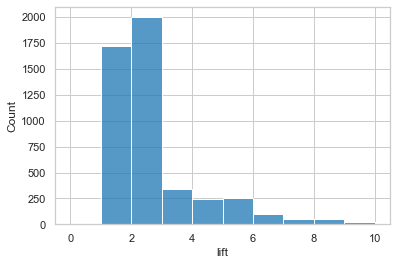

In [83]:
# Veamos la distribucion del lift
sns.histplot(rules_newank_all_df, x='lift', bins=10, binrange=(0, 10))

In [84]:
rules_newank_all_df.sort_values(by='lift', ascending=False)[:15]

,rules,support,confidence,coverage,lift,count
86,"{LFLA,TPLF} => {PLFL}",0.025397,0.942330,0.026951,25.998122,817
45,"{KHGA,LLKH} => {LKHG}",0.032889,0.976916,0.033666,22.690549,1058
71,"{KNGA,LLKN} => {LKNG}",0.026205,0.948256,0.027635,22.579173,843
43,"{DNGA,LLDN} => {LDNG}",0.029096,0.975000,0.029842,22.548364,936
40,"{LLSH,SHGA} => {LSHG}",0.031024,0.963320,0.032205,21.761978,998
73,"{DKGA,LLDK} => {LDKG}",0.032609,0.988690,0.032982,21.548215,1049
75,"{LLSR,SRGA} => {LSRG}",0.025148,0.955136,0.026330,20.901879,809
36,"{GHLE,LEVV} => {HLEV}",0.026889,0.945355,0.028444,20.886766,865
79,"{LLSK,SKGA} => {LSKG}",0.027884,0.950212,0.029345,20.176479,897
117,"{LLQH,QHGA} => {LQHG}",0.038453,0.984873,0.039044,19.306744,1237


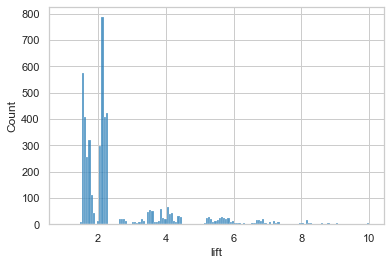

In [95]:
sns.histplot(rules_newank_all_df, x='lift', binrange=(1, 10));

In [99]:
rules_newank_all_df[['lift']].describe()

,lift
count,4888.000000
mean,2.843419
std,2.212209
min,1.512886
25%,1.701966
50%,2.129266
75%,2.662183
max,25.998122


In [ ]:
mr_freq_newank_all_df = autils.build_mr_tx_frequency_df({
    "NEWAnk": autils.read_clean_transactions("NEWAnk_len4_ALL_min", "output/clean_transactions")
})


In [ ]:
len(mr_freq_newank_all_df)

In [ ]:
mr_freq_newank_all_df.sort_values(by='freq', ascending=False)[:15]

In [ ]:
def rules_with_mr(rules_to_filter, mr):
    filtered_rules = []
    for rule in rules_to_filter:
        if mr in rule:
            filtered_rules.append(rule)
    return filtered_rules


In [ ]:
namount_top_rules = 15
namount_top_mr = 15

top_rules = rules_newank_all_df.sort_values(by='lift', ascending=False)[:namount_top_rules]
top_mrs = mr_freq_newank_all_df.sort_values(by='freq', ascending=False)[:namount_top_mr]

# Top15, no hay ningun mr que aparezca entre las 15 reglas con mas lift
# for mr in top_mrs['mr']:
#     print("-----")
#     print(mr)
#     print(rules_with_mr(top_rules['rules'], mr))

In [ ]:
top_rules.columns

In [ ]:
def print_mr_in_rules_contained(top_mrs, top_rules):
    for mr in top_mrs:
        print("-----")
        print(mr)
        print(rules_with_mr(top_rules, mr))

In [ ]:
def show_mrs_in_latex_table(df_mrs_top):
    body = ""
    for row in df_mrs_top.itertuples():
        body += f"{row.mr} & {row.freq_percentage:.3f} \\\\ \n"
    return body
        
# print(show_mrs_in_latex_table(top_mrs))

In [ ]:
def latexify_rule(rule):
    return rule.replace(",", ", ").replace("{", "\{").replace("}", "\}").replace("=>", "$\\xrightarrow{}$")

print(latexify_rule("{GHLE,LEVV} => {HLEV}"))

In [ ]:
def show_rules_in_latex_table(df_rules_top):
    body = ""
    for row in df_rules_top.itertuples():
        latex_rule = latexify_rule(row.rules)
        body += f"{latex_rule} & {row.lift:.4f} \\\\ \n"
    return body
        
# print(show_rules_in_latex_table(top_rules))

In [ ]:
mr_freq_tpr1_all_df = autils.build_mr_tx_frequency_df({
    "TPR1": autils.read_clean_transactions("TPR1_len4_ALL_min", "output/clean_transactions")
})

In [ ]:
# Con 0.025 si hay algunos matches, pero no tiene mucha gracia porque solo existen 4 reglas
# rules_tpr1_all_df = build_df_rules("TPR1", "4", "ALL", "min", "0.025")

# Al generar algunas reglas mas (112) ahi se nota
rules_tpr1_all_df = build_df_rules("TPR1", "4", "ALL", "min", "0.015")

In [ ]:
print(len(rules_tpr1_all_df))

In [ ]:
namount_top_rules = 15
namount_top_mr = 15

top_rules_tpr1_4 = rules_tpr1_all_df.sort_values(by='lift', ascending=False)[:namount_top_rules]
top_mrs_tpr1_4 = mr_freq_tpr1_all_df.sort_values(by='freq', ascending=False)[:namount_top_mr]

In [ ]:
# print_mr_in_rules_contained(top_mrs_tpr1_4['mr'], top_rules_tpr1_4['rules'])

In [ ]:
mr_freq_lrr1_all_df = autils.build_mr_tx_frequency_df({
    "LRR1": autils.read_clean_transactions("LRR1_len4_ALL_min", "output/clean_transactions")
})

In [ ]:
rules_lrr1_all_df = build_df_rules("LRR1", "4", "ALL", "min", "0.025")

In [ ]:
namount_top_rules = 15
namount_top_mr = 15

top_rules_lrr1_4 = rules_lrr1_all_df.sort_values(by='lift', ascending=False)[:namount_top_rules]
top_mrs_lrr1_4 = mr_freq_lrr1_all_df.sort_values(by='freq', ascending=False)[:namount_top_mr]

In [ ]:
# print(show_mrs_in_latex_table(top_mrs_lrr1_4))

In [ ]:
# for mr in top_mrs_lrr1_4['mr']:
#     print("-----")
#     print(mr)
#     print(rules_with_mr(top_rules_lrr1_4['rules'], mr))

In [ ]:
mr_freq_newank_5_all_df = autils.build_mr_tx_frequency_df({
    "NEWAnk": autils.read_clean_transactions("NEWAnk_len5_ALL_min", "output/clean_transactions")
})

In [ ]:
rules_newank_5_all_df = build_df_rules("NEWAnk", "5", "ALL", "min", "0.025")

In [ ]:
namount_top_rules = 15
namount_top_mr = 15

top_rules_newank_5 = rules_newank_5_all_df.sort_values(by='lift', ascending=False)[:namount_top_rules]
top_mrs_newank_5 = mr_freq_newank_5_all_df.sort_values(by='freq', ascending=False)[:namount_top_mr]

In [ ]:
# print_mr_in_rules_contained(top_mrs_newank_5['mr'], top_rules_newank_5['rules'])

In [ ]:
df = pd.DataFrame()

In [ ]:
rules_diffrences_newank = pd.concat([
    rules_differences_all_ne("NEWAnk", "4", "min", "0.025").rename(columns={'lift_x': 'lift'}).sort_values(by='lift', ascending=False),
    rules_differences_all_ne("NEWAnk", "5", "min", "0.025").rename(columns={'lift_x': 'lift'}).sort_values(by='lift', ascending=False),
    rules_differences_all_ne("NEWAnk", "6", "min", "0.025").rename(columns={'lift_x': 'lift'}).sort_values(by='lift', ascending=False),
          ])

rules_diffrences_newank[['rules', 'lift']]

In [ ]:
print(show_rules_in_latex_table(rules_diffrences_newank[['rules', 'lift']]))

In [ ]:
# HYAC -> LHYA
# no es una buena regla, nos habla de la existencia de un substring LHYAC presente en la proteina
# HIPOTESIS: pero LHYAC es un MR, no necesitabamos de una regla para saber que era un substring relevante

In [ ]:
mrs_newank_len5_df = autils.build_mr_tx_frequency_df({
    "NEWAnk": autils.read_clean_transactions("NEWAnk_len5_ALL_sub", "output/clean_transactions")
})

In [ ]:
'LHYAC' in list(mrs_newank_len5_df['mr'])

In [ ]:
mrs_newank_len6_df = autils.build_mr_tx_frequency_df({
    "NEWAnk": autils.read_clean_transactions("NEWAnk_len6_ALL_sub", "output/clean_transactions")
})

In [ ]:
# {LKNGA} => {LLKNG}
# LLKNGA
'LLKNGA' in list(mrs_newank_len6_df['mr'])

In [ ]:
#   OJO: NO FUNCIONA: 'HYAC' in test_df['mr'] como esperarias, porque revisa en el index, 
# hay que convertir a lista o usar otra sintaxis --> 'HYAC' in list(test_df['mr'])

test_df = autils.build_mr_tx_frequency_df({
    "NEWAnk": autils.read_clean_transactions("NEWAnk_len4_nomrs", "output/clean_transactions")
})
print('HYAC' in list(test_df['mr']))
print('LHYA' in list(test_df['mr']))

In [ ]:
# OJO con usar "in" en una Series
'AAFN' in test_df['mr']

In [ ]:
'AAFN' in list(test_df['mr'])

In [ ]:
mr_freq_newank_4_all_df = autils.build_mr_tx_frequency_df({
    "NEWAnk": autils.read_clean_transactions("NEWAnk_len4_ALL_min", "output/clean_transactions")
})
rules_newank_4_all_df = build_df_rules("NEWAnk", "4", "ALL", "min", "0.025")

In [ ]:
namount_bottom_rules = 15
namount_top_mr = 15

bottom_rules_newank_4_df = rules_newank_4_all_df.sort_values(by='lift', ascending=True)[:namount_bottom_rules]
top_mrs_newank_4_df = mr_freq_newank_4_all_df.sort_values(by='freq', ascending=False)[:namount_top_mr]

In [ ]:
# bottom_rules_newank_4_df

In [ ]:
print_mr_in_rules_contained(top_mrs_newank_4_df['mr'], bottom_rules_newank_4_df['rules'])

In [ ]:
print(show_rules_in_latex_table(bottom_rules_newank_4))